<a href="https://colab.research.google.com/github/fisherj1/NN/blob/master/les2-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf

In [39]:
mnist = tf.keras.datasets.mnist

In [40]:
import matplotlib.pyplot as plt

In [54]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train, x_test/255.0

In [55]:
x_train.shape

(60000, 28, 28)

In [56]:
x_test.shape

(10000, 28, 28)

In [57]:
y_train[0]

5

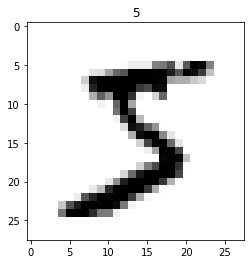

In [58]:
plt.title(y_train[0])
plt.imshow(x_train[0], cmap=plt.get_cmap('gray_r'))
plt.show()

In [59]:
def display_digit(num):
    label = y_train[num]
    image = x_train[num]
    plt.title('Example: {}  Label: {}'.format(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

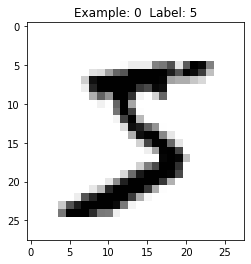

In [60]:
display_digit(0)

In [61]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.0),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [62]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [63]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 2.6556 - accuracy: 0.8342
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4267 - accuracy: 0.8995
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3114 - accuracy: 0.9217


In [64]:
loss, acc = model.evaluate(x_test, y_test)
print("Loss = {}, accuracy = {}".format(loss, acc))

313/313 [==============================] - 0s 1ms/step - loss: 2.3165 - accuracy: 0.0974
Loss = 2.316549777984619, accuracy = 0.09740000218153


In [65]:
loss, acc = model.evaluate(x_train, y_train)
print("Loss = {}, accuracy = {}".format(loss, acc))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2391 - accuracy: 0.9331
Loss = 0.23908080160617828, accuracy = 0.9331166744232178


In [66]:
predictions = model.predict(x_test[0:1,:,:])
print(predictions)
print(y_test[0])

[[0.11061787 0.05892543 0.08546117 0.08190876 0.10409772 0.08149996
  0.09589211 0.06159884 0.21804205 0.10195608]]
7
